In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\EliteBook\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [5]:
df=pd.read_csv(r"C:\Users\EliteBook\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3\amz_uk_price_prediction_dataset.csv")

In [6]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [8]:
df.shape

(2443651, 9)

In [9]:
#df.groupby("category").sum()

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
      

In [43]:
ft_category = df.groupby("category")["uid"].count()
ft_category

category
3D Printers                         248
3D Printing & Scanning             4067
Abrasive & Finishing Products       250
Action Cameras                     1697
Adapters                            254
                                  ...  
Wind Instruments                    250
Window Treatments                   239
Women                             17772
Women's Sports & Outdoor Shoes     1959
eBook Readers & Accessories         246
Name: uid, Length: 296, dtype: int64

    - Which are the top 5 most listed product categories?



In [55]:
ft_category.sort_values(ascending=False).head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: uid, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*


In [61]:
import matplotlib.pyplot as plt

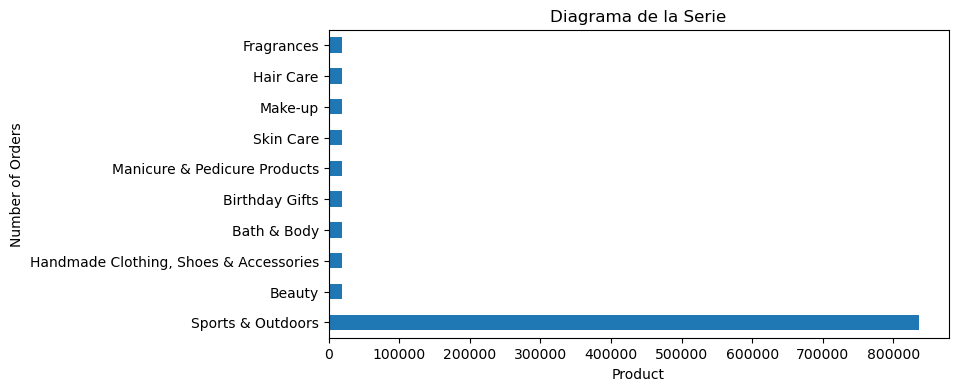

In [87]:
top_10_categories = ft_category.sort_values(ascending=False).head(10)
top_10_categories

# Crear el gráfico de líneas
top_10_categories.plot(kind='barh', title="Diagrama de la Serie", figsize=(8, 4))
plt.xlabel("Product")
plt.ylabel("Number of Orders")
plt.show()

    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

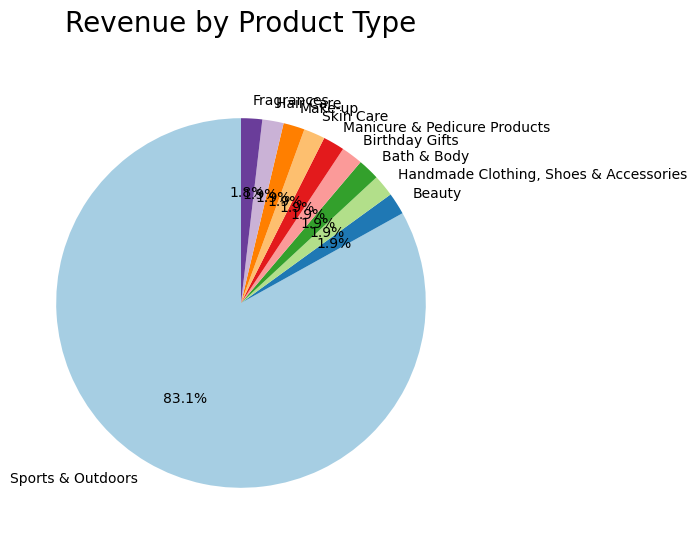

In [89]:
plt.figure(figsize=(8, 6))
top_10_categories.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Revenue by Product Type\n', fontsize=20)
plt.ylabel('')
plt.show()

---

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.


In [93]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


- What's the average price point of products listed? How does this compare with the most common price point (mode)?



In [141]:
mean_price = round(df["price"].mean(),2)
mode_price = df["price"].mode()
mode_price = float(mode_price[0])
print(f"The mean price of the products is {mean_price} pounds and the mode price is {mode_price} pounds")
print(f"The mean price is {round(mean_price/mode_price,2)} times the mode price")

The mean price of the products is 89.24 pounds and the mode price is 9.99 pounds
The mean price is 8.93 times the mode price


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.


In [ ]:
round(df.describe(),2)

In [155]:
variance_price = df["price"].std()**2
std_price = df["price"].std()
range_price = df["price"].max() - df["price"].min()
iqr_price = df["price"].quantile(q=0.75)-df["price"].quantile(q=0.25)

print(f"PRICE: \n")
print(f"Variance: {variance_price}")
print(f"Standar Deviation: {std_price}")
print(f"Range: {range_price}")
print(f"Interquartile Range: {iqr_price}")

PRICE: 

Variance: 119445.48532256526
Standar Deviation: 345.60886175352226
Range: 100000.0
Interquartile Range: 36.0


    - How varied are the product prices? Are there any indicators of a significant spread in prices?



In [167]:
print(f"The standar deviation in comparation to the mean (CV) is {round(std_price/mean_price*100,2)}%. There is a lot of spread in the prices")

The standar deviation in comparation to the mean (CV) is 387.28%. There is a lot of spread in the prices


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.


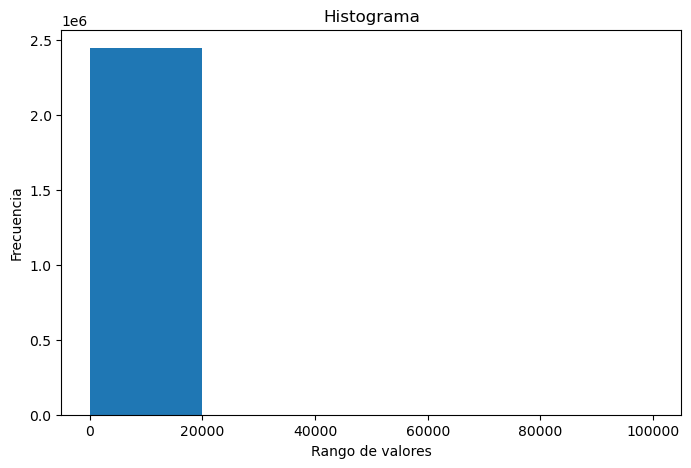


The histogram you are showing seems to have display problems because the price ranges are very unbalanced or have a highly skewed distribution. This happens when a large portion of the values ​​are concentrated in a very small range (e.g. low prices in this case) and a few values are in much larger ranges (outliers). Solution: We need to adjust the histogram to make it more readable. We can fix it using logaritmic scale: 



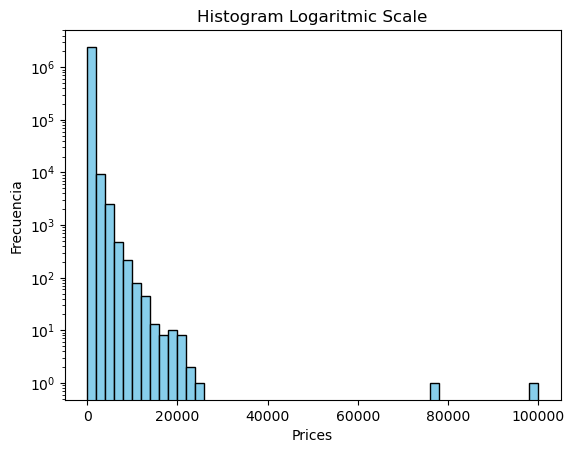

In [306]:
s=df["price"]

# Crear un histograma
s.plot(kind='hist', title="Histograma", bins=5, figsize=(8, 5))

# Etiquetas de los ejes
plt.xlabel("Rango de valores")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

print("\nThe histogram you are showing seems to have display problems because the price ranges are very unbalanced or have a highly skewed distribution. This happens when a large portion of the values ​​are concentrated in a very small range (e.g. low prices in this case) and a few values are in much larger ranges (outliers). Solution: We need to adjust the histogram to make it more readable. We can fix it using logaritmic scale: \n")

# Logaritmic scale
plt.hist(s, bins=50, color='skyblue', edgecolor='black', log=True)

plt.title("Histogram Logaritmic Scale")
plt.xlabel("Prices")
plt.ylabel("Frecuencia")
plt.show()

    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


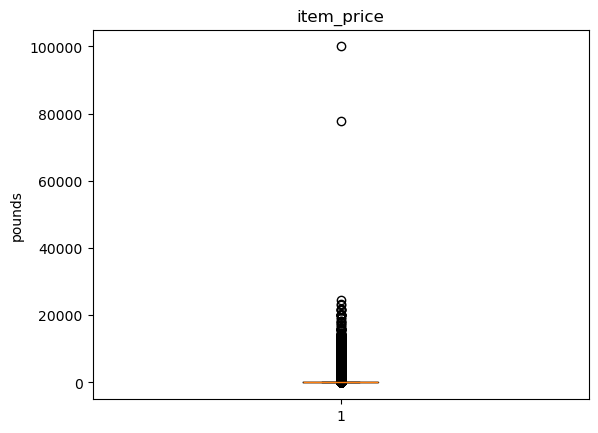

Yes, there is a lot of ouliers


In [195]:
# item_price
plt.boxplot(s)
plt.title("item_price")
plt.ylabel("pounds")
plt.show()

print("Yes, there is a lot of ouliers")


---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.


In [282]:
#round(df.groupby("stars").agg("mean", "median", "mode"),2)
mean_stars = round(df["stars"].mean(),2)
median_stars = round(df["stars"].median(),2)
mode_stars = round(df["stars"].mode(),2)
mode_stars = mode_stars[0]

print(f"RATING (stars): \n")
print(f"mean: {mean_stars}")
print(f"median: {median_stars}")
print(f"mode: {mode_stars}")

RATING (stars): 

mean: 2.15
median: 0.0
mode: 0.0


    - How do customers generally rate products? Is there a common trend?



In [ ]:
print("Most of them tents to rate lowly")

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.


In [284]:
variance_stars = round(df["stars"].std(),2)**2
standar_deviation_stars = round(df["stars"].std(),2)
iqr_stars = df["stars"].quantile(q=0.75) - df["stars"].quantile(q=0.25)

print(f"RATING (stars): \n")
print(f"variance: {variance_stars}")
print(f"Standar Deviation: {standar_deviation_stars}")
print(f"Inter Quartile Range: {iqr_stars}")

RATING (stars): 

variance: 4.7961
Standar Deviation: 2.19
Inter Quartile Range: 4.4


    - Are the ratings consistent, or is there a wide variation in customer feedback?



In [290]:


print(f"The standar deviation in comparation to the mean (CV) is {round(variance_stars/mean_stars*100,2)}%. There is a lot of spread in the rating")

The standar deviation in comparation to the mean (CV) is 223.07%. There is a lot of spread in the rating


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 


In [294]:
s1=df["stars"]

skewness = s.skew()
kurtosis = s.kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: 27.492977566280338
Kurtosis: 4241.616412866518


    - Are the ratings normally distributed, or do they lean towards higher or lower values?



In [302]:
"""
Skewness:

If the skewness is close to 0, the data is symmetric.
If the skewness is positive, the right tail is longer.
If the skewness is negative, the left tail is longer.
Kurtosis:

If kurtosis > 0: the distribution has heavy tails (more outliers).
If kurtosis < 0: the distribution has light tails.
"""

print(f"the skewness is positive ({skewness}), the right tail is longer")
print(f"kurtosis is positive ({kurtosis}): the distribution has heavy tails (more outliers)")

the skewness is positive (27.492977566280338), the right tail is longer
kurtosis is positive (4241.616412866518): the distribution has heavy tails (more outliers)


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?



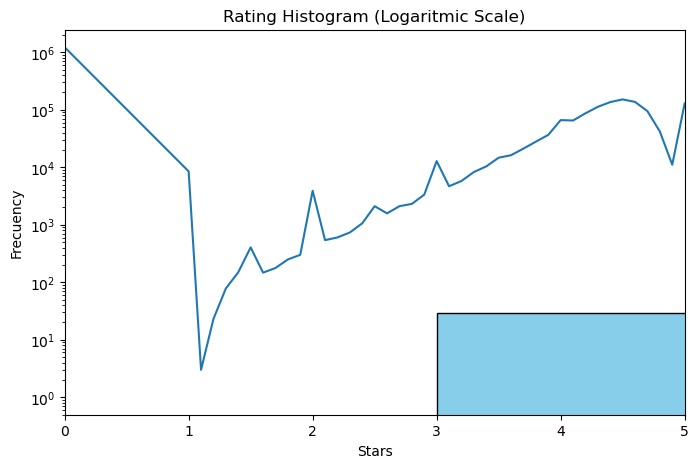

The rating value is predominantly 0. It descends until it reaches its lowest peak at 1, and grows exponentially until it reaches 5.


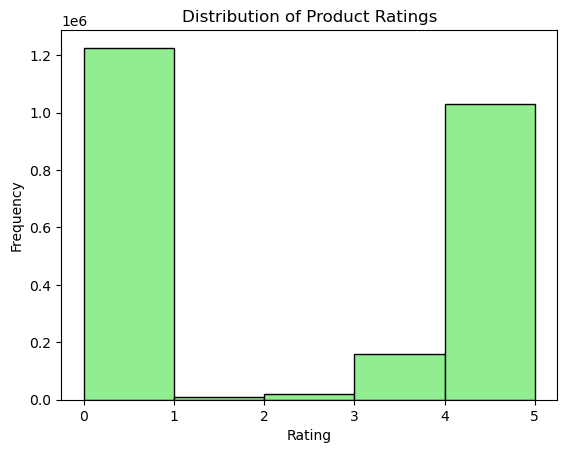

In [308]:
s2=df.groupby("stars")["uid"].count()
s2
s2.plot(kind='line', title="Gráfico con Eje X de 0 a 5", figsize=(8, 5))
plt.hist(s2, bins=50, color='skyblue', edgecolor='black', log=True)
plt.xlim(0, 5)
plt.title("Rating Histogram (Logaritmic Scale)")
plt.xlabel("Stars")
plt.ylabel("Frecuency")
plt.show()

print("The rating value is predominantly 0. It descends until it reaches its lowest peak at 1, and grows exponentially until it reaches 5.")

plt.hist(df['stars'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 